

---



# **ANALISA TREN TAHUNAN DATA METEOROLOGI KOTA JAKARTA TAHUN 2000 HINGGA 2009**

## Input Data dan Fungsi

In [33]:
#Import fungsi atau library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
from google.colab import files
uploaded = files.upload()

Saving 825220030_Jakarta_2000_2009.xlsx to 825220030_Jakarta_2000_2009 (1).xlsx


In [35]:
data = pd.read_excel("825220030_Jakarta_2000_2009.xlsx", sheet_name = "Sheet1")

## Missing Values

In [63]:
#Mengubah data dengan nilai 8888 dan 9999 dengan NaN karena merupakan missing values.
#NaN merupakan Not a Number yang berfungsi mengganti nilai 8888 dab 9999 menjadi null.
data.replace({8888: np.nan, 9999: np.nan}, inplace=True)

In [64]:
#Menampilkan jumlah missing values
data.isna().sum()

,0
Date,0
Tn,0
Tx,0
Tavg,0
RH_avg,0
RR,0
ss,0
ff_x,0
ddd_x,0
ff_avg,0


In [65]:
#Menampilkan persentase missing values
missing_percentage = data.isna().sum()/len(data)*100
missing_percentage

,0
Date,0.0
Tn,0.0
Tx,0.0
Tavg,0.0
RH_avg,0.0
RR,0.0
ss,0.0
ff_x,0.0
ddd_x,0.0
ff_avg,0.0


In [66]:
#Mengisi missing values
data = data.ffill()
data = data.bfill()

In [67]:
#Menampilkan kembali jumlah missing values
data.isna().sum()

,0
Date,0
Tn,0
Tx,0
Tavg,0
RH_avg,0
RR,0
ss,0
ff_x,0
ddd_x,0
ff_avg,0


In [68]:
#Menampilkan kembali persentase missing values
missing_percentage = data.isna().sum()/len(data)*100
missing_percentage

,0
Date,0.0
Tn,0.0
Tx,0.0
Tavg,0.0
RH_avg,0.0
RR,0.0
ss,0.0
ff_x,0.0
ddd_x,0.0
ff_avg,0.0


## Pembersihan Data

In [42]:
data.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,2000-01-01,24.0,29.4,26.8,83.0,9.1,2.0,4.0,280.0,2.0,W
1,2000-01-02,25.0,29.8,27.0,81.0,9.1,2.0,4.0,290.0,2.0,W
2,2000-01-03,25.0,30.8,26.7,83.0,9.1,0.7,4.0,260.0,1.0,W
3,2000-01-04,24.0,31.0,27.0,82.0,50.2,1.0,6.0,290.0,2.0,W
4,2000-01-05,25.0,31.8,27.0,82.0,1.6,3.5,4.0,240.0,2.0,SW


In [43]:
#Menginput kolom tahun pada data frame yang diekstraksi dari kolom Date
data['Tahun'] = pd.DatetimeIndex(data['Date']).year

In [44]:
#Menghapus kolom variabel ddd_car karena variabel tersebut tidak bersifat numerik sehingga tidak dapat digunakan dalam analisis time series
data2 = data.drop(['ddd_car'], axis = 1)
data2.head()

,Date,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,Tahun
0,2000-01-01,24.0,29.4,26.8,83.0,9.1,2.0,4.0,280.0,2.0,2000
1,2000-01-02,25.0,29.8,27.0,81.0,9.1,2.0,4.0,290.0,2.0,2000
2,2000-01-03,25.0,30.8,26.7,83.0,9.1,0.7,4.0,260.0,1.0,2000
3,2000-01-04,24.0,31.0,27.0,82.0,50.2,1.0,6.0,290.0,2.0,2000
4,2000-01-05,25.0,31.8,27.0,82.0,1.6,3.5,4.0,240.0,2.0,2000


## Analisis
Keterangan:

Tn: Temperatur Minimum (°C)

Tx: Temperatur Maksimum (°C)

Tavg: Temperatur Rata - Rata (°C)

RH_avg: Kelembapan Rata - Rata (%)

RR: Curah Hujan (mm)

ss: Lamanya Penyinaran Matahari (Jam)

ff_x: Kecepatan Angin Maksimum (m/s)

ddd_x: Arah Angin saat Kecepatan Maksimum (°)

ff_avg: Kecepatan Angin Rata - Rata (m/s)

ddd_car: Arah Angin Terbanyak (°)

### Temperatur (°C)

Text(0.5, 1.0, 'Temperatur Minimum Kota Jakarta Tahun 2000 - 2009')

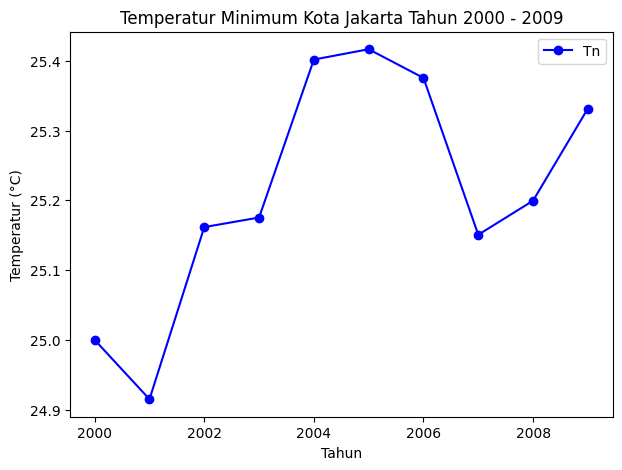

In [45]:
#Line Chart Temperatur Minimum
fig = plt.subplots(figsize=(7,5))
data.groupby('Tahun')['Tn'].mean().plot(marker='o', legend=True, color='blue')
plt.ylabel('Temperatur (°C)')
plt.xlabel('Tahun')
plt.title("Temperatur Minimum Kota Jakarta Tahun 2000 - 2009")

In [46]:
data.groupby('Tahun')['Tn'].mean()

,Tn
Tahun,
2000,25.000000
2001,24.915068
2002,25.161644
2003,25.175342
2004,25.401639
2005,25.416438
2006,25.375342
2007,25.150685
2008,25.199454


Text(0.5, 1.0, 'Temperatur Maksimum Kota Jakarta Tahun 2000 - 2009')

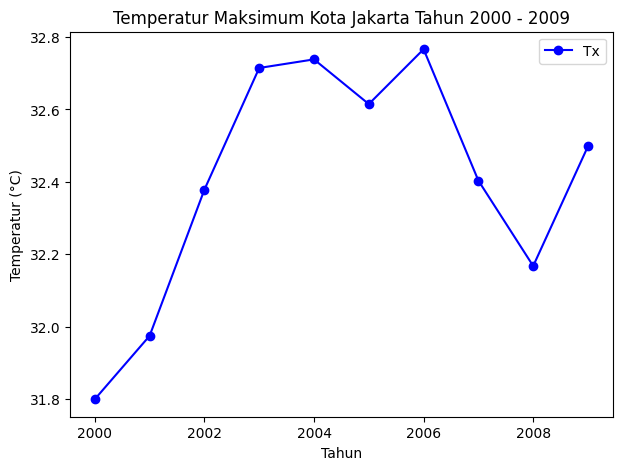

In [47]:
#Line Chart Temperatur Maksimum
fig = plt.subplots(figsize=(7,5))
data.groupby('Tahun')['Tx'].mean().plot(marker='o', legend=True, color='blue')
plt.ylabel('Temperatur (°C)')
plt.xlabel('Tahun')
plt.title("Temperatur Maksimum Kota Jakarta Tahun 2000 - 2009")

In [48]:
data.groupby('Tahun')['Tx'].mean()

,Tx
Tahun,
2000,31.799454
2001,31.974521
2002,32.378356
2003,32.714521
2004,32.738251
2005,32.614795
2006,32.766301
2007,32.403288
2008,32.167486


Text(0.5, 1.0, 'Temperatur Rata - Rata Kota Jakarta Tahun 2000 - 2009')

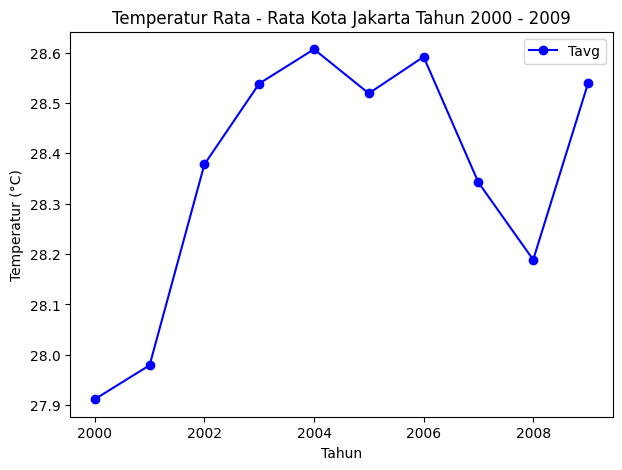

In [49]:
#Line Chart Temperatur Rata - Rata
fig = plt.subplots(figsize=(7,5))
data.groupby('Tahun')['Tavg'].mean().plot(marker='o', legend=True, color='blue')
plt.ylabel('Temperatur (°C)')
plt.xlabel('Tahun')
plt.title("Temperatur Rata - Rata Kota Jakarta Tahun 2000 - 2009")

In [50]:
data.groupby('Tahun')['Tavg'].mean()

,Tavg
Tahun,
2000,27.912022
2001,27.979452
2002,28.378082
2003,28.538356
2004,28.606557
2005,28.518904
2006,28.591507
2007,28.342192
2008,28.188798


### Kelembapan Rata - Rata (%)

Text(0.5, 1.0, 'Kelembapan Rata - Rata Kota Jakarta Tahun 2000 - 2009')

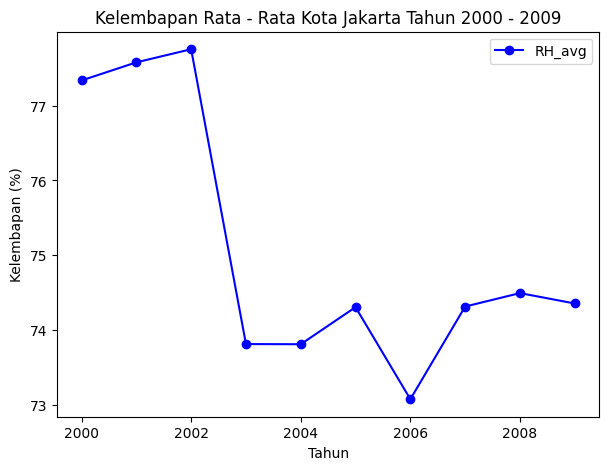

In [51]:
#Line Chart Kelembapan Rata - Rata
fig = plt.subplots(figsize=(7,5))
data.groupby('Tahun')['RH_avg'].mean().plot(marker='o', legend=True, color='blue')
plt.ylabel('Kelembapan (%)')
plt.xlabel('Tahun')
plt.title("Kelembapan Rata - Rata Kota Jakarta Tahun 2000 - 2009")

In [52]:
data.groupby('Tahun')['RH_avg'].mean()

,RH_avg
Tahun,
2000,77.336066
2001,77.578082
2002,77.753425
2003,73.813699
2004,73.811475
2005,74.306849
2006,73.076712
2007,74.315068
2008,74.494536


### Curah hujan (mm)

Text(0.5, 1.0, 'Curah Hujan Kota Jakarta Tahun 2000 - 2009')

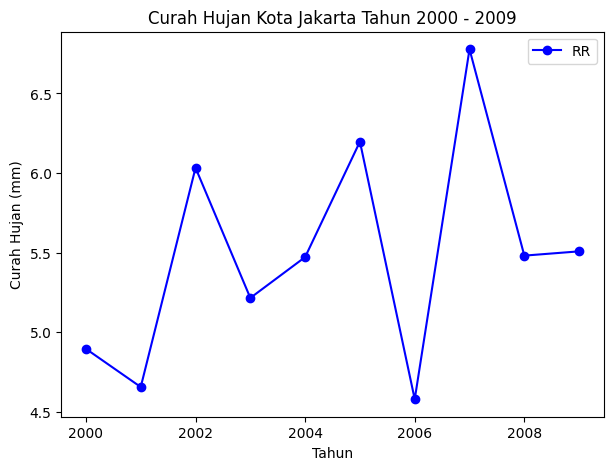

In [53]:
#Line Chart Curah Hujan
fig = plt.subplots(figsize=(7,5))
data.groupby('Tahun')['RR'].mean().plot(marker='o', legend=True, color='blue')
plt.ylabel('Curah Hujan (mm)')
plt.xlabel('Tahun')
plt.title("Curah Hujan Kota Jakarta Tahun 2000 - 2009")

In [54]:
data.groupby('Tahun')['RR'].mean()

,RR
Tahun,
2000,4.896175
2001,4.656438
2002,6.033151
2003,5.215890
2004,5.472404
2005,6.197534
2006,4.579726
2007,6.778082
2008,5.481694


### Lama Penyinaran Matahari (Jam)

Text(0.5, 1.0, 'Lama Penyinaran Matahari Kota Jakarta Tahun 2000 - 2009')

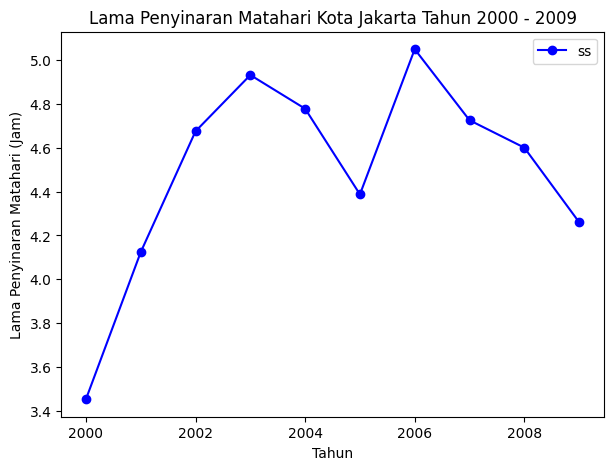

In [55]:
#Line Chart Lama Penyinaran Matahari
fig = plt.subplots(figsize=(7,5))
data.groupby('Tahun')['ss'].mean().plot(marker='o', legend=True, color='blue')
plt.ylabel('Lama Penyinaran Matahari (Jam)')
plt.xlabel('Tahun')
plt.title("Lama Penyinaran Matahari Kota Jakarta Tahun 2000 - 2009")

In [56]:
data.groupby('Tahun')['ss'].mean()

,ss
Tahun,
2000,3.451639
2001,4.123562
2002,4.675616
2003,4.932603
2004,4.778689
2005,4.387397
2006,5.050411
2007,4.726027
2008,4.600820


### Tren Tahunan Kecepatan Angin (m/s)

Text(0.5, 1.0, 'Kecepatan Angin Maksimum Kota Jakarta Tahun 2000 - 2009')

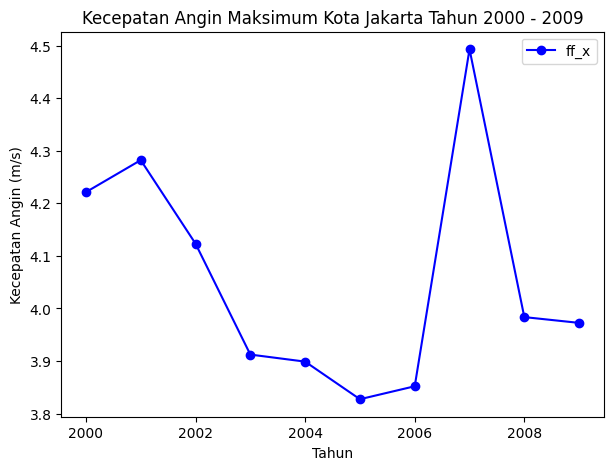

In [57]:
#Line Chart Kecepatan Angin Maksimum (m/s)
fig = plt.subplots(figsize=(7,5))
data.groupby('Tahun')['ff_x'].mean().plot(marker='o', legend=True, color='blue')
plt.ylabel('Kecepatan Angin (m/s)')
plt.xlabel('Tahun')
plt.title("Kecepatan Angin Maksimum Kota Jakarta Tahun 2000 - 2009")

In [58]:
data.groupby('Tahun')['ff_x'].mean()

,ff_x
Tahun,
2000,4.221311
2001,4.282192
2002,4.123288
2003,3.912329
2004,3.898907
2005,3.827397
2006,3.852055
2007,4.493151
2008,3.983607


Text(0.5, 1.0, 'Kecepatan Angin Rata - Rata Kota Jakarta Tahun 2000 - 2009')

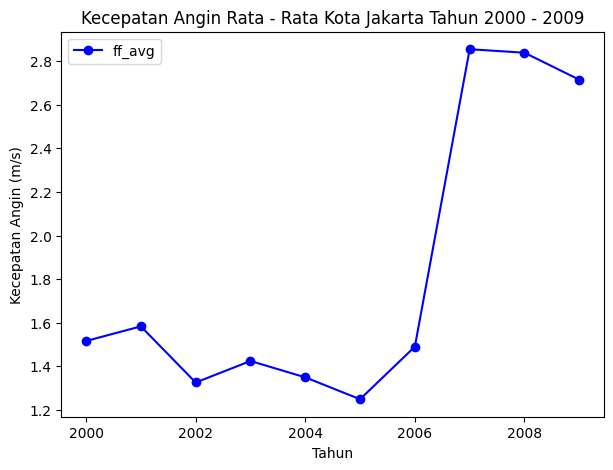

In [59]:
#Line Chart Kecepatan Angin Rata - Rata (m/s)
fig = plt.subplots(figsize=(7,5))
data.groupby('Tahun')['ff_avg'].mean().plot(marker='o', legend=True, color='blue')
plt.ylabel('Kecepatan Angin (m/s)')
plt.xlabel('Tahun')
plt.title("Kecepatan Angin Rata - Rata Kota Jakarta Tahun 2000 - 2009")

In [60]:
data.groupby('Tahun')['ff_avg'].mean()

,ff_avg
Tahun,
2000,1.516393
2001,1.583562
2002,1.326027
2003,1.424658
2004,1.349727
2005,1.249315
2006,1.490411
2007,2.854795
2008,2.838798


### Arah Angin (°)

Text(0.5, 1.0, 'Arah Angin saat Kecepatan Maksimum Kota Jakarta Tahun 2000 - 2009')

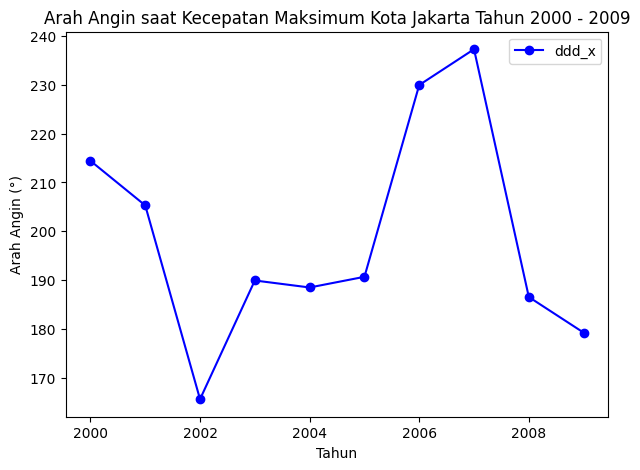

In [61]:
#Line Chart Kecepatan Angin Maksimum (m/s)
fig = plt.subplots(figsize=(7,5))
data.groupby('Tahun')['ddd_x'].mean().plot(marker='o', legend=True, color='blue')
plt.ylabel('Arah Angin (°)')
plt.xlabel('Tahun')
plt.title("Arah Angin saat Kecepatan Maksimum Kota Jakarta Tahun 2000 - 2009")

In [62]:
data.groupby('Tahun')['ddd_x'].mean()

,ddd_x
Tahun,
2000,214.445355
2001,205.301370
2002,165.556164
2003,189.904110
2004,188.469945
2005,190.657534
2006,229.986301
2007,237.328767
2008,186.516393
